<a href="https://colab.research.google.com/github/makarun99/KSVD/blob/main/%D0%91%D0%B0%D0%B1%D0%B8%D1%87_hw%D0%BA%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:

from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [59]:
import zipfile
import io

for file_name in uploaded.keys():
    if file_name.endswith(".zip"):
        with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
            zip_ref.extractall("/content/")




In [60]:
#  Імпорт бібліотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
#  Зчитування CSV
df = pd.read_csv('/content/shopping_trends.csv')

In [62]:
# Перевірка розміру, пропусків, типів
print("Розмір таблиці:", df.shape)
print("\nПропущені значення:")
print(df.isnull().sum())
print("\nТипи стовпців:")
print(df.dtypes)

Розмір таблиці: (3900, 19)

Пропущені значення:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Типи стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       

In [63]:
#  Перейменування колонок (нижній регістр + підкреслення)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [65]:

# . Побудова графіків з seaborn
sns.set(style="whitegrid")

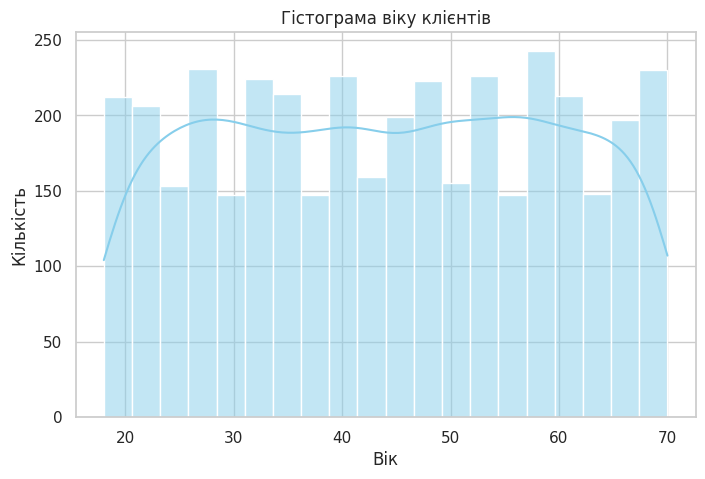

In [66]:
# 1. Гістограма віку
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Гістограма віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

<ipython-input-67-e15d1b986331>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='item_purchased', order=df['item_purchased'].value_counts().index, palette="Set2")


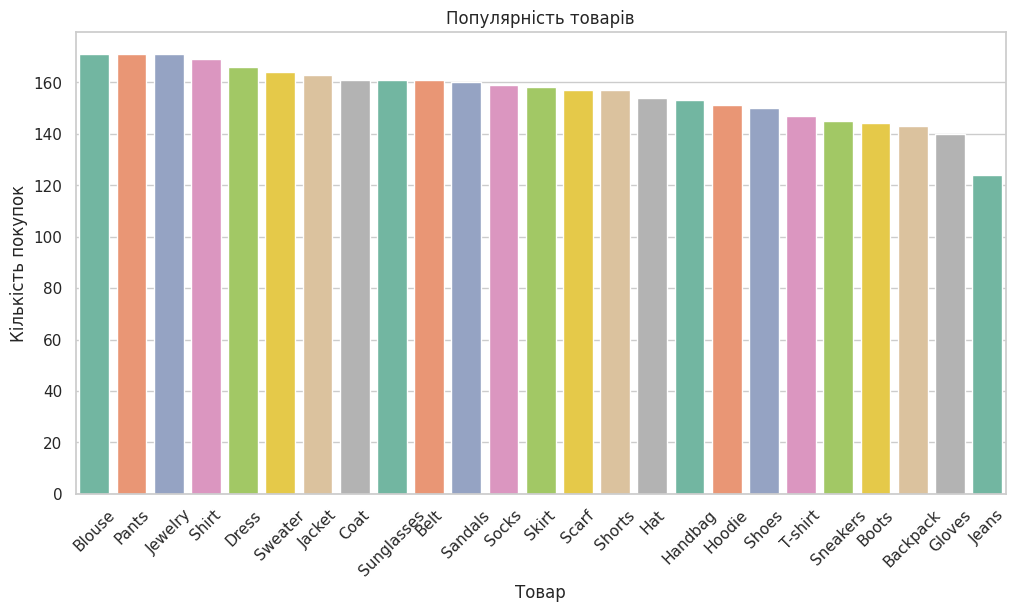

In [67]:
# 2. Розподіл покупок за item_purchased
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='item_purchased', order=df['item_purchased'].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title('Популярність товарів')
plt.xlabel('Товар')
plt.ylabel('Кількість покупок')
plt.show()

In [72]:
print("Стовпці у датафреймі:")
print(df.columns.tolist())




Стовпці у датафреймі:
['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_usd', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'payment_method', 'shipping_type', 'discount_applied', 'promo_code_used', 'previous_purchases', 'preferred_payment_method', 'frequency_of_purchases']


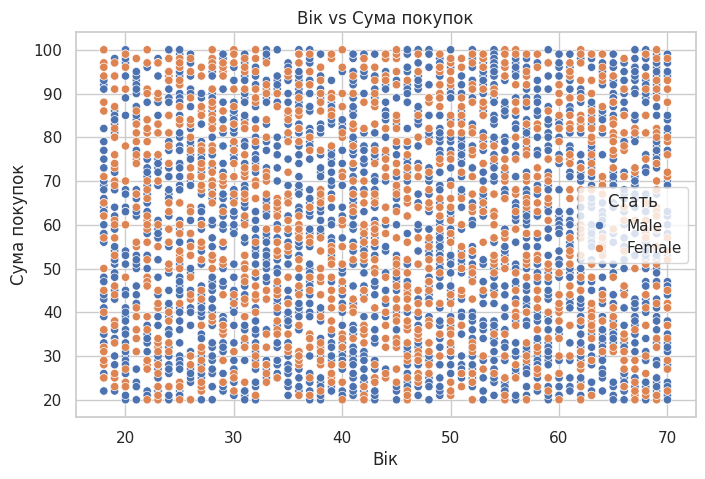

In [73]:
# scatter plot після очищення колонок
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='purchase_amount_usd', hue='gender')
plt.title('Вік vs Сума покупок')
plt.xlabel('Вік')
plt.ylabel('Сума покупок')
plt.legend(title='Стать')
plt.show()


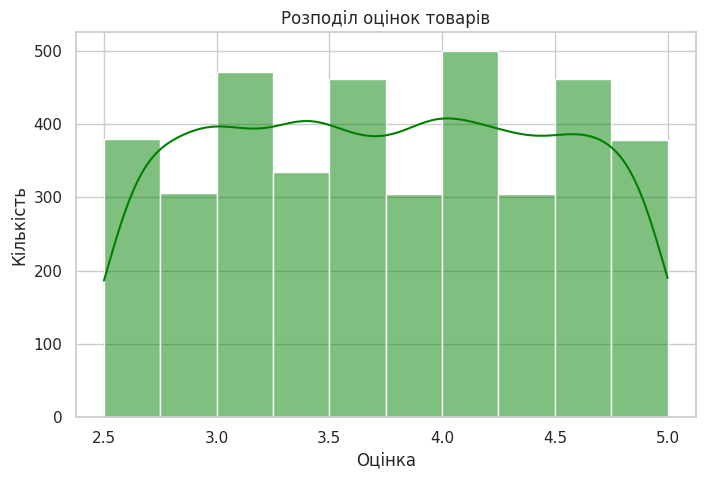

In [74]:
# 4. Розподіл оцінок товарів
plt.figure(figsize=(8, 5))
sns.histplot(df['review_rating'], bins=10, kde=True, color='green')
plt.title('Розподіл оцінок товарів')
plt.xlabel('Оцінка')
plt.ylabel('Кількість')
plt.show()


<ipython-input-75-2e25cada54f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


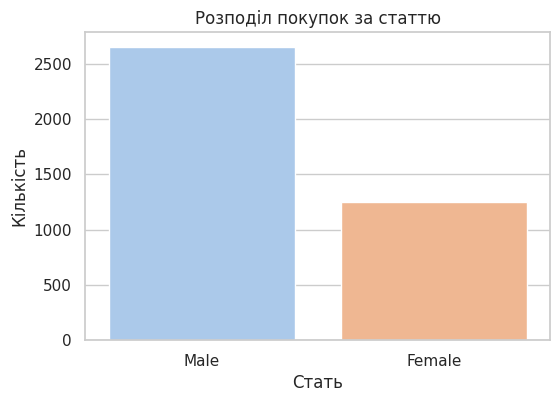

In [75]:
# 5. Категоріальна діаграма по статі
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Розподіл покупок за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.show()


<ipython-input-77-bef4c6390931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='review_rating', y='purchase_amount_usd', palette='coolwarm')


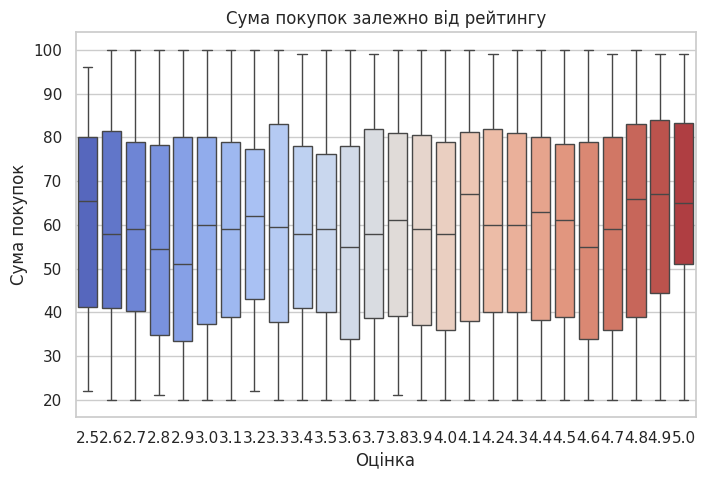

In [77]:
# 6. Залежність між рейтингом і сумою покупок
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='review_rating', y='purchase_amount_usd', palette='coolwarm')
plt.title('Сума покупок залежно від рейтингу')
plt.xlabel('Оцінка')
plt.ylabel('Сума покупок')
plt.show()